## Wikipedia Webscraping

In [1]:
%pip install pydantic

Note: you may need to restart the kernel to use updated packages.


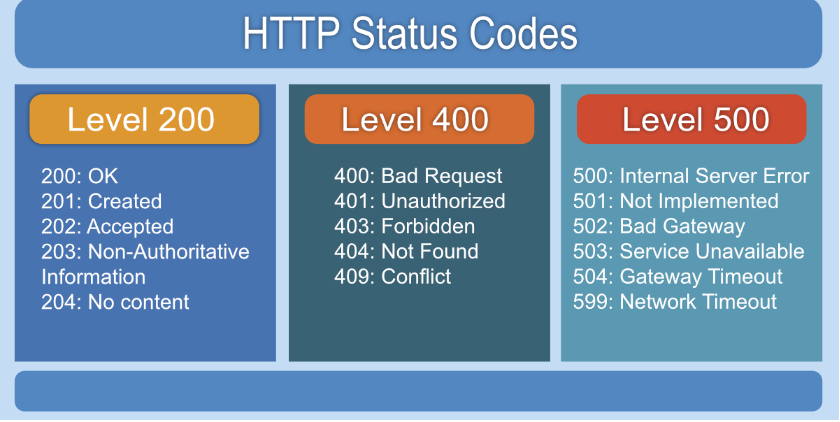

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import requests

In [6]:
url1 = "https://en.wikipedia.org/wiki/World_population"
response = requests.get(url1)
response

<Response [200]>

In [7]:
print(response.content[0:100])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'


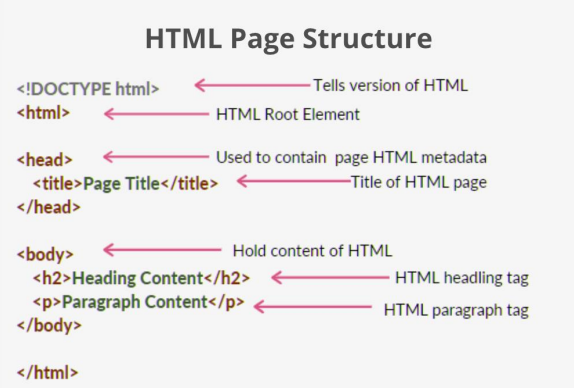

In [8]:
from bs4 import BeautifulSoup

In [9]:
soup = BeautifulSoup(response.content)

In [10]:
soup.title.text

'World population - Wikipedia'

### Getting h1 tag

In [11]:
h1_tag = soup.find(name="h1", class_="firstHeading")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [12]:
h1_tag.text

'World population'

In [13]:
h1_tag = soup.find(name="h1", id="firstHeading")
h1_tag.text

'World population'

In [14]:
p_tags = soup.find_all(name="p")
p_tags

[<p class="mw-empty-elt">
 </p>,
 <p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 years more to reach 8 billion.
 </p>,
 <p>The human population has experienced <a href="/wiki/Population_growth" title="Population growth">continuous growth</a> following the <a href="/wiki/Great_Famine_of_1315%E2%80%931317" title="Great Famine of 1315–1317">Great Famine of 1315–1317</a> and the end of the <a href="/wiki/Black_Death" title="Black Death">Black Death</a> in 1350, when it was nearly 370,000,000.<sup class="reference" id="cite_ref-2"><a href="#cite_not

In [15]:
p_text = [element.text for element in p_tags]
p_text

['\n',
 'In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8\xa0billion.\n',
 'The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affair

In [16]:
paras = "\n".join(p_text)

In [17]:
print(paras[0:100])



In world demographics, the world population is the total number of humans currently alive. It was 


In [18]:
tables = soup.find_all(name="table", class_="wikitable")

In [19]:
t1 = tables[0]
t1

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_58-0"><a href="#cite_note-:6-58"><span class="cite-bracket">[</span>58<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>200,000+</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td

In [20]:
import pandas as pd
df1 = pd.read_html(str(t1))[0]
df1

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


In [21]:
a_tags = soup.find_all("a", class_="mw-file-description")
a_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="225" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/300px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/450px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/600px-World_Population_Prospects.svg.png 2x" width="300"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="328" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/220px-Illustration_of_contempor

In [22]:
a1 = a_tags[0].get("href")
a1

'/wiki/File:World_Population_Prospects.svg'

In [23]:
home = "https://en.wikipedia.org"

In [24]:
home + a1

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [25]:
img_links = [home + element.get("href") for element in a_tags]
img_links

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2006megacities.svg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_West_Y

## Creating a class for Wikipedia scraping

In [26]:
from pydantic import BaseModel, HttpUrl

In [27]:
class WikiScraper(BaseModel):

    url: HttpUrl

    def get_page(self):
        response = requests.get(self.url)
        response.raise_for_status()
        return response.content
    
    def get_soup(self):
        content = self.get_page()
        soup = BeautifulSoup(content)
        return soup
    
    def page_title(self):
        soup = self.get_soup()
        return soup.title.text
    
    def get_h1(self):
        soup = self.get_soup()
        h1_tag = soup.find(name="h1", id="firstHeading")
        return h1_tag.text
    
    def get_paras(self):
        soup = self.get_soup()
        p_tags = soup.find_all("p")
        p_text = [element.text for element in p_tags]
        paras = "\n".join(p_text)
        return paras 
         
    def get_tables(self):
        soup = self.get_soup()
        table_tags = soup.find_all(name="table", class_="wikitable")
        dfs = []
        for i in table_tags:
            data = pd.read_html(str(i))[0]
            dfs.append(data)
        return dfs
    
    def get_img_links(self):
        soup = self.get_soup()
        a_tags = soup.find_all("a", class_="mw-file-description")
        home = "https://en.wikipedia.org"
        img_links = [home + element.get("href") for element in a_tags]
        return img_links
    
    def get_a_tags(self):
        soup = self.get_soup()
        home = "https://en.wikipedia.org"
        a_tags = soup.find_all("a", title=True)
        links = [home + element.get("href") for element in a_tags]
        return links

In [28]:
try:
    scraper = WikiScraper(url="abc")
except Exception as e:
    print(f"Exception occured : {e}")

Exception occured : 1 validation error for WikiScraper
url
  Input should be a valid URL, relative URL without a base [type=url_parsing, input_value='abc', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/url_parsing


In [29]:
try:
    scraper = WikiScraper(url="https://en.wikipedia.org/wiki/World_population")
    title = scraper.page_title()
    print(title)
    paras = scraper.get_paras()
    print(paras[0:1000])
    tables = scraper.get_tables()
    for i in tables:
        display(i)
except Exception as e:
    print(e)

World population - Wikipedia


In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8 billion.

The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[86],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[89]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[90]
2,United States,337044535,4.14%,16 Oct 2024,National population clock[91]
3,Indonesia,278696200,3.43%,1 Jul 2023,National annual estimate[92]
4,Pakistan,229488994,2.82%,1 Jul 2022,UN projection[93]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[93]
6,Brazil,218296856,2.68%,16 Oct 2024,National population clock[94]
7,Bangladesh,168220000,2.07%,1 Jul 2020,Annual Population Estimate[95]
8,Russia,147190000,1.81%,1 Oct 2021,2021 preliminary census results[96]
9,Mexico,128271248,1.58%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][100],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[101]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[118]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[119]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[145],c. 2100[145]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


In [30]:
scraper1 = WikiScraper(url="https://en.wikipedia.org/wiki/Data_science")
scraper1

WikiScraper(url=Url('https://en.wikipedia.org/wiki/Data_science'))

In [31]:
scraper1.page_title()

'Data science - Wikipedia'

In [32]:
scraper1.get_h1()

'Data science'

In [33]:
scraper1.get_img_links()

['https://en.wikipedia.org/wiki/File:PIA23792-1600x1200(1).jpg',
 'https://en.wikipedia.org/wiki/File:EDA_example_-_Always_plot_your_data.jpg',
 'https://en.wikipedia.org/wiki/File:Cloud_computing_in_enabling_data_science_at_scale.jpg']

In [35]:
paras2 = scraper1.get_paras()
print(paras2)



Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]

Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]

Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data.[5] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[6] However, data science is different from computer science and information sc

In [36]:
scraper2 = WikiScraper(url="https://en.wikipedia.org/wiki/Python_(programming_language)")
scraper2

WikiScraper(url=Url('https://en.wikipedia.org/wiki/Python_(programming_language)'))

In [37]:
scraper2.url

Url('https://en.wikipedia.org/wiki/Python_(programming_language)')

In [38]:
scraper2.page_title()

'Python (programming language) - Wikipedia'

In [39]:
scraper2.get_img_links()

['https://en.wikipedia.org/wiki/File:Python-logo-notext.svg',
 'https://en.wikipedia.org/wiki/File:Wikibooks-logo-en-noslogan.svg',
 'https://en.wikipedia.org/wiki/File:Guido_van_Rossum_OSCON_2006_cropped.png',
 'https://en.wikipedia.org/wiki/File:Hello_World_in_Python.png',
 'https://en.wikipedia.org/wiki/File:Af-Helloworld_(C_Sharp).svg',
 'https://en.wikipedia.org/wiki/File:Python_3._The_standard_type_hierarchy-en.svg',
 'https://en.wikipedia.org/wiki/File:Python_Powered.png',
 'https://en.wikipedia.org/wiki/File:Octicons-terminal.svg',
 'https://en.wikipedia.org/wiki/File:Python-logo-notext.svg',
 'https://en.wikipedia.org/wiki/File:Symbol_portal_class.svg',
 'https://en.wikipedia.org/wiki/File:Symbol_portal_class.svg']

In [40]:
links2 = scraper2.get_a_tags()

In [41]:
links2

['https://en.wikipedia.org/wiki/Main_Page',
 'https://en.wikipedia.org/wiki/Wikipedia:Contents',
 'https://en.wikipedia.org/wiki/Portal:Current_events',
 'https://en.wikipedia.org/wiki/Special:Random',
 'https://en.wikipedia.org/wiki/Wikipedia:About',
 'https://en.wikipedia.org//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://en.wikipedia.org/wiki/Help:Contents',
 'https://en.wikipedia.org/wiki/Help:Introduction',
 'https://en.wikipedia.org/wiki/Wikipedia:Community_portal',
 'https://en.wikipedia.org/wiki/Special:RecentChanges',
 'https://en.wikipedia.org/wiki/Wikipedia:File_upload_wizard',
 'https://en.wikipedia.org/wiki/Special:Search',
 'https://en.wikipedia.orghttps://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en',
 'https://en.wikipedia.org/w/index.php?title=Special:CreateAccount&returnto=Python+%28programming+language%29',
 'https://en.wikipedia.org/w/index.php?title=Special:UserLogi

In [42]:
scraper3 = WikiScraper(url = 'https://en.wikipedia.org/wiki/GPT-J')
scraper3.get_h1()

'GPT-J'